#  CBC Data Analysis & Anemia Diagnosis
## Project Overview
This project aims to diagnose different types of **Anemia** and other blood-related conditions based on **Complete Blood Count (CBC)** data using Machine Learning algorithms.

###  Objective:
To build a robust classification model that can predict the diagnosis (e.g., Healthy, Iron Deficiency Anemia, Leukemia, etc.) based on patient blood test results.

In [1]:
#  IMPORTS

import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

##  Dataset Features Description
The dataset contains the following parameters from a standard CBC test:

| Feature | Full Name | Description |
|:-------:|:---------|:------------|
| **WBC** | White Blood Cell Count | Vital for immune response. High count indicates infection/leukemia. |
| **RBC** | Red Blood Cell Count | Responsible for oxygen transport. |
| **HGB** | Hemoglobin | Protein in RBCs that carries oxygen. Low levels indicate anemia. |
| **HCT** | Hematocrit | Percentage of blood volume occupied by RBCs. |
| **MCV** | Mean Corpuscular Volume | Average size of RBCs. Crucial for distinguishing anemia types (Microcytic vs Macrocytic). |
| **MCH** | Mean Corpuscular Hemoglobin | Average amount of hemoglobin per RBC. |
| **MCHC**| Mean Corpuscular Hemoglobin Conc. | Average concentration of hemoglobin in RBCs. |
| **PLT** | Platelet Count | Involved in blood clotting. |
| **Diagnosis** | **Target Variable** | The medical diagnosis based on the parameters above. |

In [2]:
# 2. DATA LOADING & EXPLORATION

filename = "diagnosed_cbc_data_v4.csv"
cbc = pd.read_csv(filename)

# Quick check of the data
print("First 5 rows:")
display(cbc.head())

print("\nData Info:")
print(cbc.info())

print("\nStatistical Summary:")
display(cbc.describe())

print("\nTarget Variable Distribution:")
print(cbc['Diagnosis'].value_counts())

First 5 rows:


,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB
None

Statistical Summary:


,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000



Target Variable Distribution:
Diagnosis
Healthy                           336
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Iron deficiency anemia            189
Thrombocytopenia                   73
Other microcytic anemia            59
Leukemia                           47
Macrocytic anemia                  18
Leukemia with thrombocytopenia     11
Name: count, dtype: int64


In [3]:
order_of_bars = cbc['Diagnosis'].value_counts().index

C:\Users\mahmo\AppData\Local\Temp\ipykernel_13052\1190100292.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=cbc, palette='viridis', order=order_of_bars)


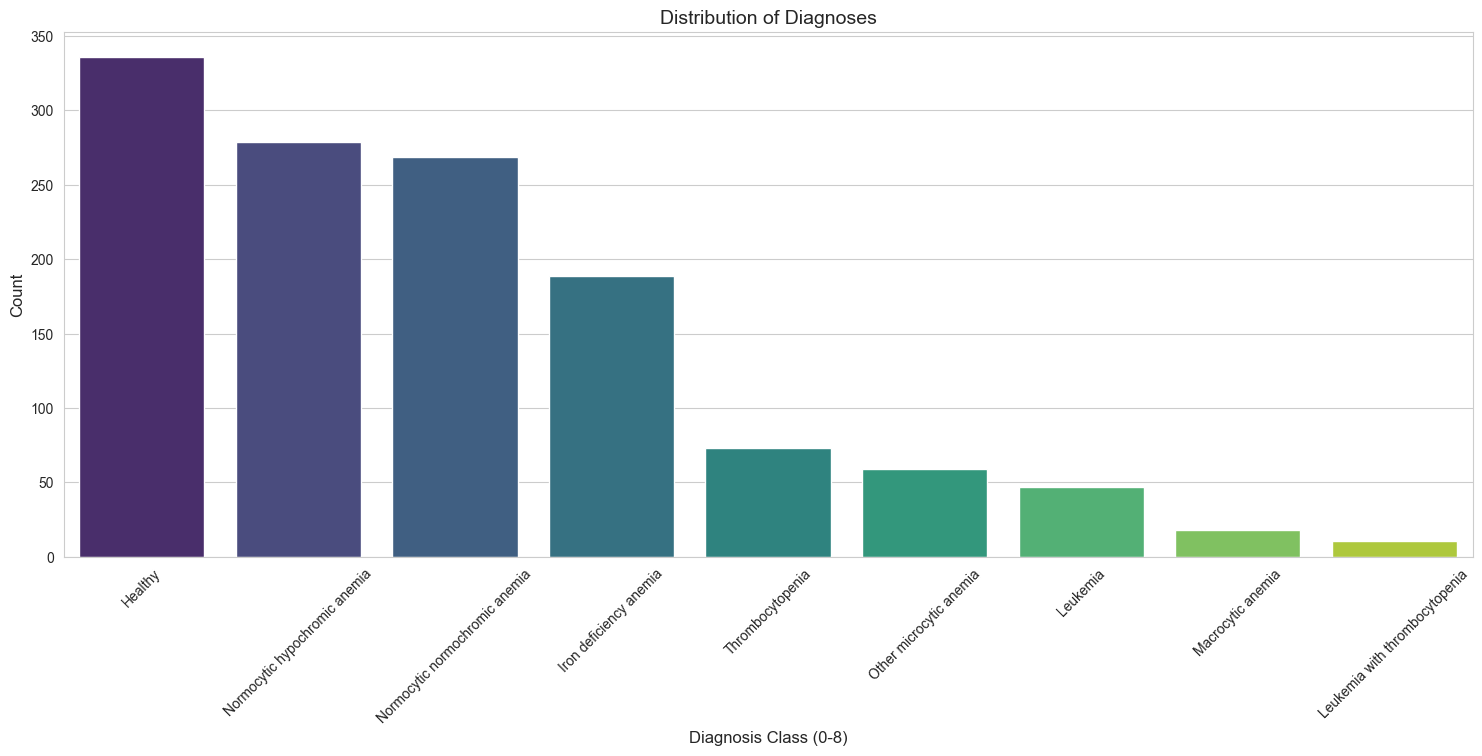

In [4]:
sns.set_style("whitegrid")
plt.figure(figsize=(40, 15))

plt.subplot(2, 2, 1)
sns.countplot(x='Diagnosis', data=cbc, palette='viridis', order=order_of_bars)

plt.title('Distribution of Diagnoses', fontsize=14)
plt.xlabel('Diagnosis Class (0-8)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45);



##  Data Preprocessing & Feature Engineering

**Steps taken:**
1.  **Label Encoding:** Converting the categorical `Diagnosis` column into numeric values (0-8) to make it machine-readable.
2.  **Feature Selection:** Dropping columns with low correlation to the target or high multicollinearity (e.g., `PDW`, `LYMn`, `PCT`) to improve model performance and reduce noise.
3.  **Data Splitting:** Splitting data into **80% Training** and **20% Testing**.
4.  **Scaling:** Using `StandardScaler` to normalize the data, which is essential for distance-based algorithms like **KNN**.

In [5]:
# ==========================================
# 3. PREPROCESSING
# ==========================================

# 3.1 Label Encoding
diagnosis_map = {
    'Healthy': 0,
    'Other microcytic anemia': 1,
    'Iron deficiency anemia': 2,
    'Normocytic hypochromic anemia': 3,
    'Normocytic normochromic anemia': 4,
    'Macrocytic anemia': 5,
    'Thrombocytopenia': 6,
    'Leukemia': 7,
    'Leukemia with thrombocytopenia': 8
}
cbc['Diagnosis'] = cbc['Diagnosis'].map(diagnosis_map)

# 3.2 Feature Selection
# Dropping features with low correlation or high multicollinearity
columns_to_drop = ['PDW', 'LYMn', 'NEUTp', 'LYMp', 'PCT', 'NEUTn']
cbc.drop(columns_to_drop, axis=1, inplace=True)

# 3.3 Splitting Data
X = cbc.drop("Diagnosis", axis=1)
y = cbc["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3.4 Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##  Machine Learning Modeling

We will compare three different classifiers to find the best performing model:

1.  **K-Nearest Neighbors (KNN):** A distance-based classifier.
2.  **Logistic Regression:** A linear model useful for understanding feature importance.
3.  **Decision Tree:** A non-linear model that simulates human decision-making processes.

In [6]:

print("--- Starting Model Training ---\n")

# Model 1: KNN
print("1. Training K-Nearest Neighbors...")
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print(f"K-Nearest Neighbors Training Accuracy: {knn_model.score(X_train, y_train)*100:.2f}%")
print(f"KNN Test Accuracy: {knn_model.score(X_test, y_test)*100:.2f}%")
print("-" * 30)

# Model 2: Logistic Regression
print("2. Training Logistic Regression...")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f"Logistic Regression Training Accuracy: {lr_model.score(X_train, y_train)*100:.2f}%")
print(f"Logistic Regression Test Accuracy: {lr_model.score(X_test, y_test)*100:.2f}%")
print("-" * 30)

# Model 3: Decision Tree
print("3. Training Decision Tree...")
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print(f"Decision Tree Training Accuracy: {dt_model.score(X_train, y_train)*100:.2f}%")
print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred_dt)*100:.2f}%")



--- Starting Model Training ---

1. Training K-Nearest Neighbors...
K-Nearest Neighbors Training Accuracy: 90.43%
KNN Test Accuracy: 80.16%
------------------------------
2. Training Logistic Regression...
Logistic Regression Training Accuracy: 76.37%
Logistic Regression Test Accuracy: 71.60%
------------------------------
3. Training Decision Tree...
Decision Tree Training Accuracy: 99.71%
Decision Tree Test Accuracy: 99.61%


In [7]:
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


Confusion Matrix (Logistic Regression):
[[55  3  1  4  3  0  1  0  0]
 [ 0  0  1  0 11  0  0  0  0]
 [ 0  0 33  3  2  0  0  0  0]
 [ 3  0  3 41  7  0  1  1  0]
 [10  0  0  5 38  0  1  0  0]
 [ 0  0  0  1  2  1  0  0  0]
 [ 1  0  0  2  0  0 12  0  0]
 [ 3  0  0  2  1  0  0  3  0]
 [ 0  0  0  0  0  0  1  0  1]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        67
           1       0.00      0.00      0.00        12
           2       0.87      0.87      0.87        38
           3       0.71      0.73      0.72        56
           4       0.59      0.70      0.64        54
           5       1.00      0.25      0.40         4
           6       0.75      0.80      0.77        15
           7       0.75      0.33      0.46         9
           8       1.00      0.50      0.67         2

    accuracy                           0.72       257
   macro avg       0.71      0.56      0.59   

In [8]:
print("\nConfusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))


Confusion Matrix (KNN):
[[61  0  2  0  1  0  3  0  0]
 [ 1  8  1  0  2  0  0  0  0]
 [ 0  0 31  7  0  0  0  0  0]
 [ 5  2  6 41  2  0  0  0  0]
 [ 0  0  1  7 46  0  0  0  0]
 [ 0  0  1  0  1  2  0  0  0]
 [ 4  0  0  0  0  0 11  0  0]
 [ 4  0  0  0  1  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  2]]

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        67
           1       0.80      0.67      0.73        12
           2       0.74      0.82      0.78        38
           3       0.75      0.73      0.74        56
           4       0.87      0.85      0.86        54
           5       1.00      0.50      0.67         4
           6       0.79      0.73      0.76        15
           7       1.00      0.44      0.62         9
           8       1.00      1.00      1.00         2

    accuracy                           0.80       257
   macro avg       0.86      0.74      0.78       257
weighted avg       0.81 

In [9]:
print("\nConfusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))


Confusion Matrix (Decision Tree):
[[67  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0]
 [ 1  0 37  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  2]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      1.00      1.00        12
           2       1.00      0.97      0.99        38
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         2

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weig

##  Model Evaluation & Comparison

Based on the accuracy scores on the test set, here is the performance summary:

| Model | Accuracy | Observations |
|:------|:--------:|:-------------|
| **K-Nearest Neighbors (KNN)** | ~80.16% | Moderate performance. Sensitive to outliers and feature scaling. |
| **Logistic Regression** | ~71.60% | Lowest accuracy. The data is likely non-linear. |
| **Decision Tree** | **~99.6%** | **Best Performance**. The model effectively captured the non-linear relationships. |

###  Conclusion
The **Decision Tree Classifier** is selected as the final model due to its superior accuracy.

In [10]:
# 5. SAVING THE MODEL
print("\n--- Saving the Best Model ---")
filename = 'DecisionTree.pkl'
with open(filename, 'wb') as file:
    pickle.dump(dt_model, file)

print(f"Model saved successfully as '{filename}'")


--- Saving the Best Model ---
Model saved successfully as 'DecisionTree.pkl'


In [11]:
# 6. TESTING THE SAVED MODEL

print("\n--- Testing Saved Model with a Sample ---")

with open('DecisionTree.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

sample_data = X_test[0]
actual_label = y_test.iloc[0] if hasattr(y_test, 'iloc') else y_test[0]

# Making a prediction
# Reshape because the model expects a 2D array (1 row, n columns)
prediction = loaded_model.predict(sample_data.reshape(1, -1))

print(f"Sample Features (Scaled): {sample_data}")
print(f"Predicted Class: {prediction[0]}")
print(f"Actual Class: {actual_label}")

if prediction[0] == actual_label:
    print(" Prediction is Correct!")
else:
    print(" Prediction is Incorrect.")


--- Testing Saved Model with a Sample ---
Sample Features (Scaled): [-0.45782409  0.02395394  0.28475538  0.12776199  0.21145049 -0.0300566
 -0.45545104 -0.86519727]
Predicted Class: 0
Actual Class: 0
 Prediction is Correct!


##  Visualization & Interpretation
Visualizing the data and model results helps in understanding:
1. **Class Distribution:** Is the dataset balanced?
2. **Correlation:** How features relate to each other.
3. **Confusion Matrix:** Where exactly the model fails.
4. **Feature Importance:** Which blood tests are most critical for diagnosis.


--- Generating Visualizations ---


C:\Users\mahmo\AppData\Local\Temp\ipykernel_13052\3281754174.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='magma')


Text(0.5, 0, 'Importance Score')

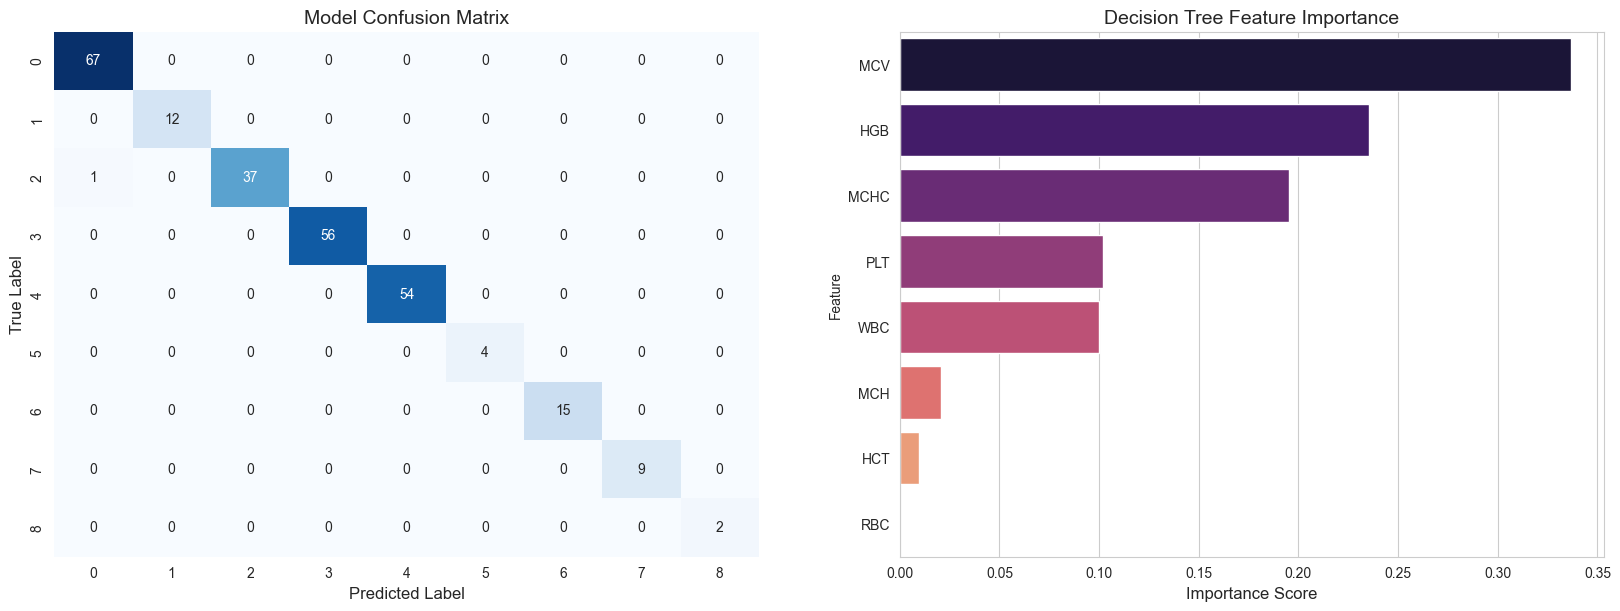

In [12]:
# 7. VISUALIZATION
print("\n--- Generating Visualizations ---")

# Set the visual style
sns.set_style("whitegrid")
plt.figure(figsize=(20, 15))


#  Confusion Matrix Heatmap ---
plt.subplot(2, 2, 3)
# Using y_test and y_pred_dt from Section 4
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Model Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Feature Importance (Decision Tree) ---
plt.subplot(2, 2, 4)
# Get feature importance from the trained Decision Tree
importances = dt_model.feature_importances_
feature_names = X.columns
# Create a DataFrame for plotting
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='magma')
plt.title('Decision Tree Feature Importance', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)

